## 파이썬 머신러닝
# 로지스틱 회귀 (Logistic Regression)

- 로지스틱 회귀는 이름과 다르게 **분류(Classification)** 알고리즘이다.
- 로지스틱 회귀는 각 클래스를 **직선** 또는 **평면** 으로 가른다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

### 로지스틱회귀 맛보기

In [3]:
X = iris.data
y = iris.target

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
model.score(X, y)

0.96

In [6]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.96

### 속성을 2개로 제한

In [11]:
# sepal length 와 sepal width

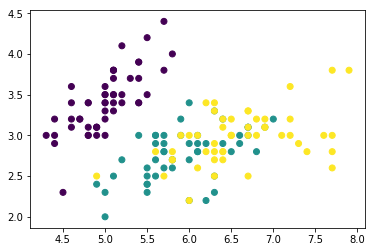

In [12]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)

In [13]:
X = iris.data[:,:2]
y = iris.target

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
model.score(X, y)

0.7666666666666667

In [16]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.7666666666666667

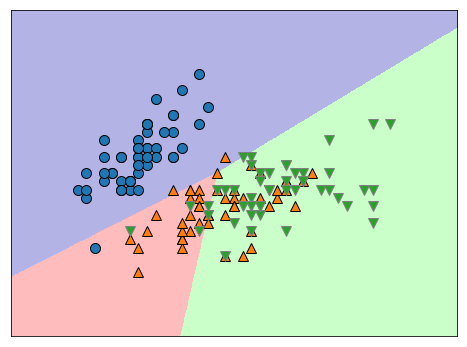

In [17]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 속성을 2개로 클래스도 2개로 제한

In [18]:
### sepal length/petal length, versicolor/virginica
X = iris.data[50:,[0,2]]
X.shape

(100, 2)

In [19]:
y = iris.target[50:]
y = np.where(y==1, 0, 1) # y = np.array([0]*50 + [1]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

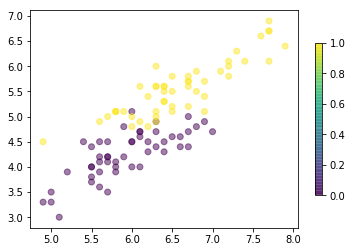

In [20]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.colorbar(shrink=0.7)

In [21]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
model.score(X, y)

0.91

In [23]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.91

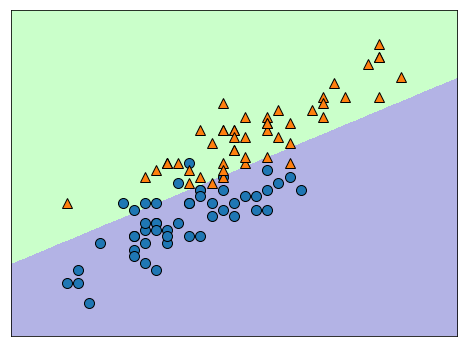

In [24]:
import mglearn

plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [25]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

### 옵션 C
- C 값이 클수록 칼 같이 자른다
- C 값이 작을수록 대강 자른다

In [42]:
model = LogisticRegression(C=100)
model.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
model.score(X, y)

0.95

In [44]:
pred_y = model.predict(X)
(pred_y==y).mean()

0.95

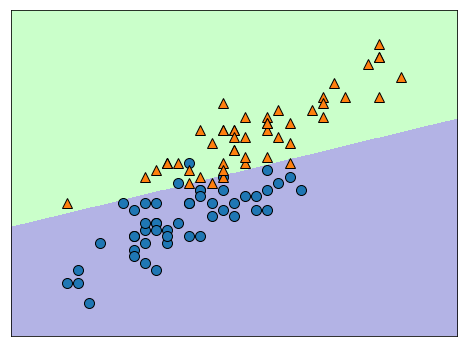

In [45]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

### 로지스틱회귀의 원리 (신경망 관점)
- 선형회귀의 결과를 시그모이드(로지스틱)함수에 적용한다
- 시그모이드함수는 계단함수의 역할이다
- 최종 결과는 0~1 사이의 값을 가진다 (대부분은 0이나 1이 된다)

<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png">

<img src="https://sebastianraschka.com/images/faq/logisticregr-neuralnet/sigmoid.png">

<br>(출처: https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html)

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [52]:
sigmoid(-5)

0.0066928509242848554

In [53]:
W = np.array([1,1]) # w1, w2
b = 0

pred_y = sigmoid(X@W + b) # 예측값
pred_y

array([0.99999171, 0.99998154, 0.9999925 , 0.99992515, 0.99998489,
       0.99996283, 0.9999833 , 0.99972542, 0.99998633, 0.99988835,
       0.99979657, 0.99995892, 0.9999546 , 0.9999796 , 0.99989897,
       0.99998489, 0.99995892, 0.99994983, 0.99997746, 0.99992515,
       0.99997746, 0.99995892, 0.99998633, 0.9999796 , 0.99997746,
       0.9999833 , 0.99999083, 0.99999171, 0.99997246, 0.99989897,
       0.99990858, 0.99989897, 0.99993872, 0.99998489, 0.99994983,
       0.99997246, 0.9999888 , 0.99997746, 0.99993872, 0.99992515,
       0.99994983, 0.99997746, 0.99994455, 0.99975154, 0.99994455,
       0.99994983, 0.99994983, 0.99997246, 0.99969655, 0.99994455,
       0.99999545, 0.99998154, 0.99999774, 0.99999321, 0.99999545,
       0.99999932, 0.99991728, 0.99999876, 0.99999627, 0.99999833,
       0.99999083, 0.99999171, 0.99999545, 0.99997746, 0.99998154,
       0.99999171, 0.99999386, 0.99999944, 0.99999954, 0.9999833 ,
       0.99999663, 0.99997246, 0.99999944, 0.99998633, 0.99999

In [54]:
X@W+b

array([11.7, 10.9, 11.8,  9.5, 11.1, 10.2, 11. ,  8.2, 11.2,  9.1,  8.5,
       10.1, 10. , 10.8,  9.2, 11.1, 10.1,  9.9, 10.7,  9.5, 10.7, 10.1,
       11.2, 10.8, 10.7, 11. , 11.6, 11.7, 10.5,  9.2,  9.3,  9.2,  9.7,
       11.1,  9.9, 10.5, 11.4, 10.7,  9.7,  9.5,  9.9, 10.7,  9.8,  8.3,
        9.8,  9.9,  9.9, 10.5,  8.1,  9.8, 12.3, 10.9, 13. , 11.9, 12.3,
       14.2,  9.4, 13.6, 12.5, 13.3, 11.6, 11.7, 12.3, 10.7, 10.9, 11.7,
       12. , 14.4, 14.6, 11. , 12.6, 10.5, 14.4, 11.2, 12.4, 13.2, 11. ,
       11. , 12. , 13. , 13.5, 14.3, 12. , 11.4, 11.7, 13.8, 11.9, 11.9,
       10.8, 12.3, 12.3, 12. , 10.9, 12.7, 12.4, 11.9, 11.3, 11.7, 11.6,
       11. ])

In [55]:
cost = ((pred_y - y)**2).mean() # MSE로 비용계산
cost

0.49994177807143036

In [59]:
W = np.array([1, 1]) # w1, w2
b = -0.1

pred_y = sigmoid(X@W + b)
cost = ((pred_y - y)**2).mean() # MSE
cost

0.499935656172912

In [61]:
w1=1
w2=1
b=0

pred_y = w1*X[:,0] + w2*X[:,1] + b

In [62]:
pred_y = sigmoid(pred_y)

In [63]:
cost = ((pred_y - y)**2).mean() # MSE
cost

0.49994177807143036

### 시그모이드함수 분석

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

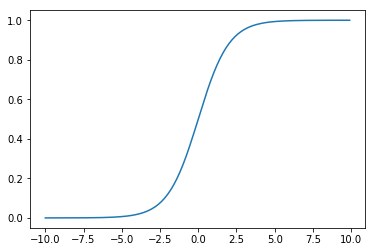

In [64]:
x = np.arange(-10,10,0.1)
plt.plot(x, sigmoid(x))

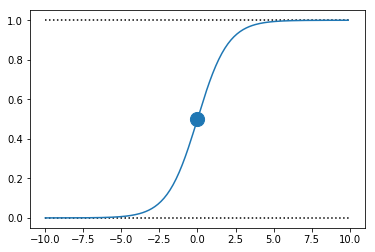

In [82]:
x = np.arange(-10,10,0.1)
plt.hlines([0,1], -10,10, linestyles=':')
plt.plot(x, sigmoid(x))
plt.scatter([0],[0.5], s=200)

- 최종출력값이 0.3 이라면, 0.5를 기준으로 해서 레이블-0 으로 판별한다
- 최종출력값이 0.3 이라면, 레이블-1 이 될 확률이 0.3, 레이블-0이 될 확률이 0.7로 해석할 수 있다
- 결과적으로 시그모이드함수의 출력값을 **확률**로 해석할 수 있다

### 가중치 분석

In [65]:
### sepal length/pepal length, versicolor/virginica
X = iris.data[50:,[0,2]]
X.shape

(100, 2)

In [66]:
y = iris.target[50:]
y = np.where(y==1, 0, 1) # y = np.array([0]*50 + [1]*50)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
model.coef_, model.intercept_

(array([[-2.22916226,  3.19217353]]), array([-1.61383101]))

In [84]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]

w1, w2, b

(-0.6413354060178963, 0.9092564588403724, -0.3131901206112607)

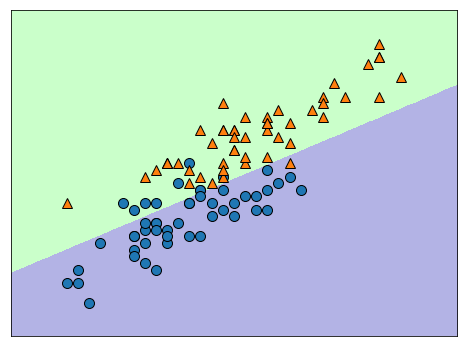

In [86]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

<img src="https://plot.ly/~florianh/149.png">
<br>(출처: https://florianhartl.com/logistic-regression-geometric-intuition.html)

<img src="https://dpzbhybb2pdcj.cloudfront.net/orland/v-11/Figures/15image015.png">
<br>(출처: https://livebook.manning.com/book/math-for-programmers/chapter-15/v-11/131)

- 평면방정식
> z = ax + by + c

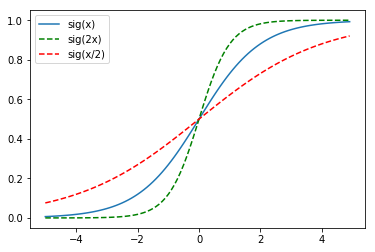

In [69]:
rng = np.arange(-5, 5, 0.1)
plt.plot(rng, sigmoid(rng))
plt.plot(rng, sigmoid(2*rng), 'g--')
plt.plot(rng, sigmoid(0.5*rng), 'r--')
plt.legend(['sig(x)', 'sig(2x)', 'sig(x/2)'])

Text(0.5,0,'target')

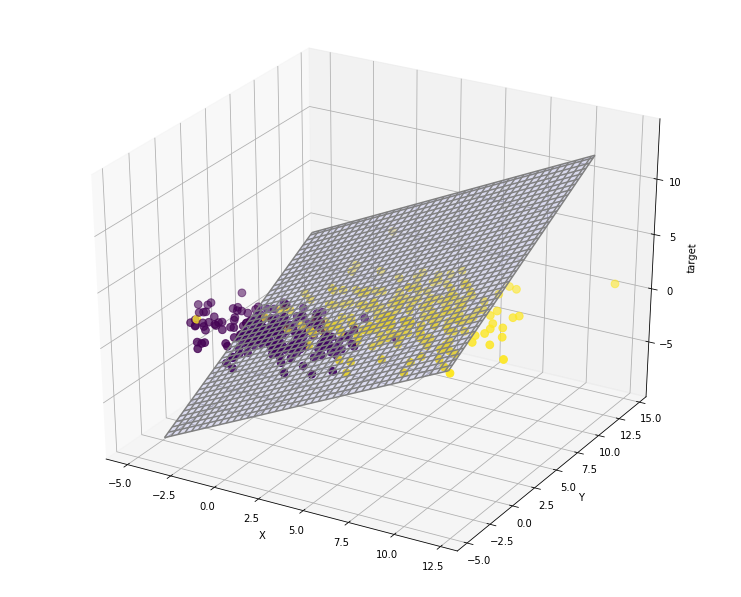

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                shade=True, alpha=0.1, color='b')
ax.plot_wireframe(xx, yy, model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0],
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

#ax.view_init(60, 70)

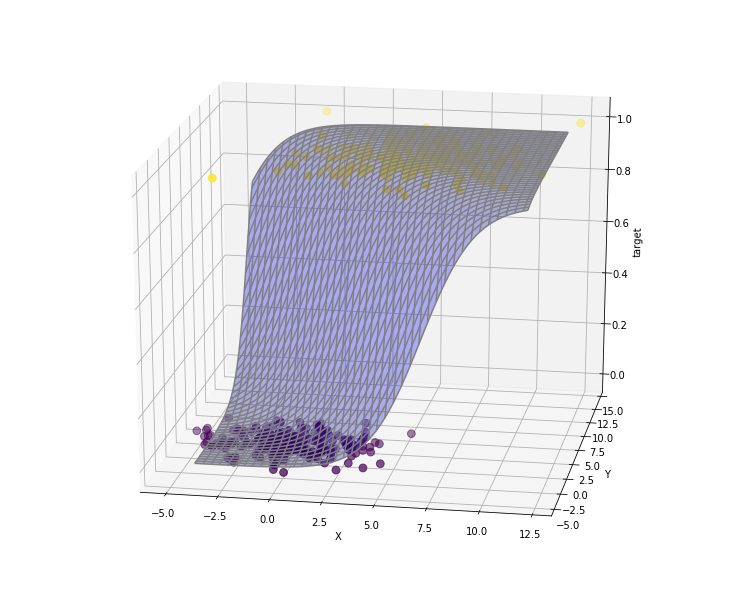

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,8])
ax = Axes3D(fig)

a = np.arange(-4,12,0.2)
b = np.arange(-4,12,0.2)
xx, yy = np.meshgrid(a,b)
ax.plot_surface(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                shade=True, alpha=0.3, color='b')
ax.plot_wireframe(xx, yy, sigmoid(model.coef_[0,0]*xx + model.coef_[0,1]*yy + model.intercept_[0]),
                  rstride=2, cstride=2, color='0.5')

ax.scatter(X[:,0], X[:,1], y, c=y, s=60)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('target')

ax.view_init(20, -80)

In [7]:
X = iris.data[50:, [0,1]]
y = iris.target[50:]
y = np.where(y==1, 0, 1)

In [8]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
pred_y = model.predict(X)
pred_y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [10]:
model.coef_, model.intercept_

(array([[ 0.53005011, -0.48504635]]), array([-1.84939066]))

In [11]:
W = model.coef_[0]
b = model.intercept_[0]

In [12]:
X@W + b # 양수면 클래스-1, 음수면 클래스-0

array([ 0.30881174, -0.00921832,  0.30431137, -0.0497217 ,  0.23780523,
       -0.18623485, -0.11072797, -0.4162564 ,  0.2423056 , -0.40275527,
       -0.16923285, -0.1772341 ,  0.26380799, -0.02271945, -0.2877445 ,
        0.19830134, -0.33624914, -0.08472521,  0.36981801, -0.09372596,
       -0.27424337,  0.02578519,  0.27730911,  0.02578519,  0.13629558,
        0.19380097,  0.39682026,  0.24680598, -0.07572446, -0.08922558,
       -0.09822633, -0.09822633, -0.08472521,  0.02128481, -0.44225916,
       -0.31824763,  0.19830134,  0.37431839, -0.33624914, -0.14673097,
       -0.1952356 , -0.07122408, -0.03622057, -0.31474675, -0.19073523,
       -0.28324412, -0.23473949,  0.03028556, -0.35875101, -0.18623485,
       -0.11072797, -0.08472521,  0.45882602,  0.08329057,  0.14079596,
        0.72385107, -0.46476103,  0.61334068,  0.48932916,  0.22080322,
        0.04378669,  0.23330485,  0.29981099, -0.04072095, -0.13322984,
       -0.00921832,  0.14079596,  0.388819  ,  0.97087463,  0.26

In [14]:
sigmoid(X@W + b)

array([0.57659519, 0.49769544, 0.57549613, 0.48757214, 0.55917271,
       0.45357539, 0.47234626, 0.39741291, 0.56028175, 0.40065054,
       0.45779248, 0.4558071 , 0.56557215, 0.49432038, 0.42855614,
       0.54941352, 0.41672089, 0.47883136, 0.591415  , 0.47658565,
       0.43186565, 0.50644594, 0.56888639, 0.50644594, 0.53402125,
       0.54829917, 0.59792345, 0.56139019, 0.48107793, 0.47770839,
       0.47546314, 0.47546314, 0.47883136, 0.505321  , 0.39120279,
       0.42110287, 0.54941352, 0.59250204, 0.41672089, 0.46338293,
       0.45134555, 0.4822015 , 0.49094585, 0.42195654, 0.45246023,
       0.42965862, 0.44158313, 0.50757081, 0.41126194, 0.45357539,
       0.47234626, 0.47883136, 0.61273564, 0.52081061, 0.53514096,
       0.67345449, 0.38585698, 0.64870248, 0.61994839, 0.55497762,
       0.51094492, 0.55806308, 0.57439631, 0.48982117, 0.46674172,
       0.49769544, 0.53514096, 0.59599837, 0.7252938 , 0.56557215,
       0.56360522, 0.44047368, 0.70554936, 0.54495325, 0.52530

In [15]:
pred_y = np.array(sigmoid(X@W + b)>0.5, dtype=int)
pred_y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

In [16]:
pred_y = np.array((X@W + b)>0, dtype=int)
pred_y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

### predict_proba() 함수
- 각 클래스에 속할 확률은 model.predict_proba() 함수로 알 수 있다.
- 각 행의 합은 1(100%)가 된다.

In [17]:
model.predict_proba(X)

array([[0.42340481, 0.57659519],
       [0.50230456, 0.49769544],
       [0.42450387, 0.57549613],
       [0.51242786, 0.48757214],
       [0.44082729, 0.55917271],
       [0.54642461, 0.45357539],
       [0.52765374, 0.47234626],
       [0.60258709, 0.39741291],
       [0.43971825, 0.56028175],
       [0.59934946, 0.40065054],
       [0.54220752, 0.45779248],
       [0.5441929 , 0.4558071 ],
       [0.43442785, 0.56557215],
       [0.50567962, 0.49432038],
       [0.57144386, 0.42855614],
       [0.45058648, 0.54941352],
       [0.58327911, 0.41672089],
       [0.52116864, 0.47883136],
       [0.408585  , 0.591415  ],
       [0.52341435, 0.47658565],
       [0.56813435, 0.43186565],
       [0.49355406, 0.50644594],
       [0.43111361, 0.56888639],
       [0.49355406, 0.50644594],
       [0.46597875, 0.53402125],
       [0.45170083, 0.54829917],
       [0.40207655, 0.59792345],
       [0.43860981, 0.56139019],
       [0.51892207, 0.48107793],
       [0.52229161, 0.47770839],
       [0.

In [18]:
display(model.predict_proba(X)[:10], pred_y[:10], y[:10])

array([[0.42340481, 0.57659519],
       [0.50230456, 0.49769544],
       [0.42450387, 0.57549613],
       [0.51242786, 0.48757214],
       [0.44082729, 0.55917271],
       [0.54642461, 0.45357539],
       [0.52765374, 0.47234626],
       [0.60258709, 0.39741291],
       [0.43971825, 0.56028175],
       [0.59934946, 0.40065054]])

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
model.predict_proba(X).argmax(axis=1)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

- 각 샘플의 확률(sigmoid 적용값) 계산
> $$ 평면높이 = w_1 x_1 + w_2 x_2 + b $$
> $$ 시그모이드평면높이 = \frac {1} {1 + e^{-(w_1 x_1 + w_2 x_2 + b)}} $$

In [29]:
n = 1
p1 = sigmoid(model.coef_[0,0]*X[n,0] + model.coef_[0,1]*X[n,1] + model.intercept_[0])
p0 = 1-p1
p0, p1

(0.016781009007563852, 0.9832189909924361)

### decision_function()
- 각 샘플의 선형회귀 결과 평면까지의 거리

In [20]:
model.decision_function(X) # X@W + b

array([ 0.30881174, -0.00921832,  0.30431137, -0.0497217 ,  0.23780523,
       -0.18623485, -0.11072797, -0.4162564 ,  0.2423056 , -0.40275527,
       -0.16923285, -0.1772341 ,  0.26380799, -0.02271945, -0.2877445 ,
        0.19830134, -0.33624914, -0.08472521,  0.36981801, -0.09372596,
       -0.27424337,  0.02578519,  0.27730911,  0.02578519,  0.13629558,
        0.19380097,  0.39682026,  0.24680598, -0.07572446, -0.08922558,
       -0.09822633, -0.09822633, -0.08472521,  0.02128481, -0.44225916,
       -0.31824763,  0.19830134,  0.37431839, -0.33624914, -0.14673097,
       -0.1952356 , -0.07122408, -0.03622057, -0.31474675, -0.19073523,
       -0.28324412, -0.23473949,  0.03028556, -0.35875101, -0.18623485,
       -0.11072797, -0.08472521,  0.45882602,  0.08329057,  0.14079596,
        0.72385107, -0.46476103,  0.61334068,  0.48932916,  0.22080322,
        0.04378669,  0.23330485,  0.29981099, -0.04072095, -0.13322984,
       -0.00921832,  0.14079596,  0.388819  ,  0.97087463,  0.26

### 다중분류
- 클래스가 3개 이상인 경우

In [21]:
X = iris.data[:, [0,1]]
y = iris.target

In [22]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
model.coef_

array([[-2.49579289,  4.01011301],
       [ 0.49709451, -1.63380222],
       [ 1.15921404, -1.77736568]])

In [24]:
model.intercept_

array([ 0.81713932,  1.22543562, -2.22516119])

In [27]:
sigmoid(X@model.coef_[2] + model.intercept_[2])

array([0.0735122 , 0.13272124, 0.07839003, 0.08297387, 0.05585043,
       0.05229555, 0.050411  , 0.07783491, 0.09287887, 0.11356364,
       0.07298889, 0.06273908, 0.11993659, 0.0709203 , 0.06842219,
       0.03112724, 0.05229555, 0.0735122 , 0.08536173, 0.04448242,
       0.11831872, 0.05267893, 0.0358711 , 0.10170004, 0.06273908,
       0.14664161, 0.07783491, 0.08180826, 0.0961902 , 0.07839003,
       0.10240647, 0.11831872, 0.029758  , 0.0350798 , 0.11356364,
       0.10748796, 0.11202079, 0.11356364, 0.07894877, 0.0865732 ,
       0.06599697, 0.25037016, 0.05666902, 0.06599697, 0.04448242,
       0.11993659, 0.04448242, 0.07041403, 0.06552337, 0.091588  ,
       0.5502713 , 0.37900786, 0.56551665, 0.51563864, 0.58251497,
       0.35565685, 0.31272303, 0.30774348, 0.56740982, 0.26970191,
       0.50404433, 0.3278566 , 0.69421906, 0.42352584, 0.29153863,
       0.50793416, 0.25622939, 0.42540909, 0.74111299, 0.45587093,
       0.25476301, 0.46740145, 0.65350303, 0.46740145, 0.50986

In [28]:
sigmoid(X@model.coef_.T + model.intercept_)

array([[8.93213213e-01, 1.23717242e-01, 7.35122033e-02],
       [6.49784750e-01, 2.24399789e-01, 1.32721245e-01],
       [8.72057494e-01, 1.58906439e-01, 7.83900296e-02],
       [8.54189142e-01, 1.74694263e-01, 8.29738722e-02],
       [9.41286712e-01, 1.02405329e-01, 5.58504273e-02],
       [9.51630089e-01, 7.85594422e-02, 5.22955451e-02],
       [9.51240935e-01, 1.14776113e-01, 5.04109976e-02],
       [8.77885720e-01, 1.36576619e-01, 7.78349052e-02],
       [8.12292917e-01, 2.09925425e-01, 9.28788657e-02],
       [7.34798128e-01, 1.97247339e-01, 1.13563636e-01],
       [8.98190233e-01, 1.05710789e-01, 7.29888859e-02],
       [9.22135187e-01, 1.25270609e-01, 6.27390843e-02],
       [7.04261158e-01, 2.15866790e-01, 1.19936585e-01],
       [8.92407212e-01, 1.76758578e-01, 7.09202981e-02],
       [9.15443802e-01, 8.11648000e-02, 6.84221945e-02],
       [9.85735542e-01, 4.18924080e-02, 3.11272350e-02],
       [9.51630089e-01, 7.85594422e-02, 5.22955451e-02],
       [8.93213213e-01, 1.23717

```
z = ax+by+c => ax+by+c=0 => y = -ax/b - c/b
x2 = -w1*x1/w2 - b/w2
```

### 클래스가 3개인 경우

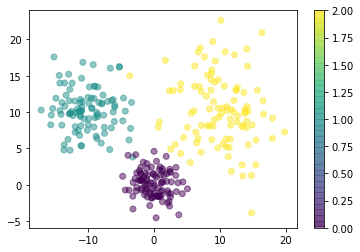

In [30]:
from sklearn.datasets import make_blobs

X, y = make_blobs(300, 2, [[0,0],[-10,10],[10,10]], [2,3,5])

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.colorbar()

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

score = model.score(X, y)
score

0.9866666666666667

In [32]:
display(model.coef_, model.intercept_)

array([[-0.14315501, -1.04296445],
       [-0.72459301,  0.20826342],
       [ 0.7295477 ,  0.42266515]])

array([ 3.29123649, -3.799485  , -3.88858741])

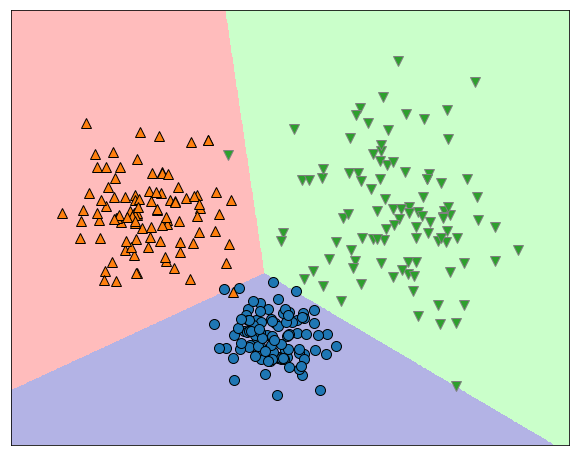

In [34]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

- 한 클래스와 나머지 클래스 간의 경계선을 그린다
- 이렇게 나온 경계선들을 통합하여 판정을 내린다

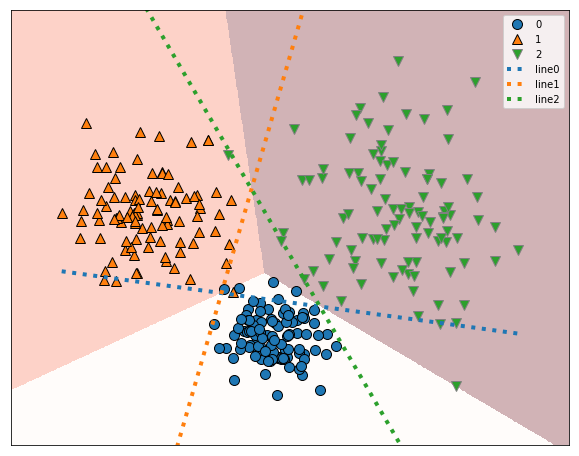

In [35]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

w = model.coef_
b = model.intercept_

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(w[i,0]*rng + b[i])/w[i,1], ':', lw=4, label='line'+str(i))
plt.legend()

In [36]:
pred_y = model.predict(X)
display(np.round(model.predict_proba(X)[:10],2), pred_y[:10], y[:10])

array([[0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.08, 0.  , 0.92],
       [0.74, 0.01, 0.25],
       [0.  , 0.99, 0.  ],
       [0.84, 0.02, 0.15],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.93, 0.03, 0.04],
       [0.01, 0.99, 0.  ]])

array([2, 2, 2, 0, 1, 0, 1, 2, 0, 1])

array([2, 2, 2, 0, 1, 0, 1, 2, 0, 1])

In [37]:
model.decision_function(X)[:10]

array([[ -9.19397347, -10.16926608,   9.07322554],
       [-11.72830481,  -5.46579618,   6.35787032],
       [ -2.37476329, -11.18679476,   6.00286359],
       [  0.71271141,  -5.10071513,  -1.22437899],
       [ -5.56220383,   4.42347306,  -6.05603073],
       [  0.79786694,  -4.29210183,  -1.9950085 ],
       [ -6.99607561,   9.45954864,  -9.70982599],
       [-11.52055561,  -7.36883343,   7.9334384 ],
       [  1.94886942,  -3.66347306,  -3.22686377],
       [ -4.80321782,   8.43568965, -10.07603021]])

### 확률 계산

In [38]:
help(model.predict_proba)

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.



In [61]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solve

In [62]:
result = sigmoid(X@(w.T)+b)
result.shape

(300, 3)

In [63]:
result[:10]

array([[1.19591470e-01, 9.99316040e-01, 7.24911634e-06],
       [1.58525528e-05, 2.43257186e-04, 9.99993984e-01],
       [8.52979570e-02, 9.99198864e-01, 1.16302684e-05],
       [9.33442422e-04, 1.73657132e-02, 9.84933615e-01],
       [8.35891793e-03, 9.96643345e-01, 3.73298926e-04],
       [6.29264436e-01, 6.90309537e-03, 2.83544906e-01],
       [1.79326232e-02, 9.83701290e-01, 1.07336513e-03],
       [5.66689456e-01, 7.55766983e-06, 9.98498718e-01],
       [2.91656539e-05, 4.08341699e-02, 9.97683691e-01],
       [2.99312238e-01, 9.99672284e-01, 1.31296287e-06]])

In [64]:
prob = result/((result.sum(axis=1)).reshape(-1,1))
prob

array([[1.06881663e-01, 8.93111858e-01, 6.47870294e-06],
       [1.58485416e-05, 2.43195634e-04, 9.99740956e-01],
       [7.86512608e-02, 9.21338015e-01, 1.07239998e-05],
       [9.30434541e-04, 1.73097547e-02, 9.81759811e-01],
       [8.31422430e-03, 9.91314473e-01, 3.71302964e-04],
       [6.84196941e-01, 7.50571058e-03, 3.08297348e-01],
       [1.78842057e-02, 9.81045327e-01, 1.07046707e-03],
       [3.62056607e-01, 4.82857810e-06, 6.37938564e-01],
       [2.80831327e-05, 3.93185564e-02, 9.60653360e-01],
       [2.30419940e-01, 7.69579049e-01, 1.01075996e-06],
       [4.28035848e-01, 5.71961788e-01, 2.36423376e-06],
       [9.75066740e-01, 1.80937882e-02, 6.83947200e-03],
       [3.98867081e-02, 9.60111866e-01, 1.42604205e-06],
       [9.59440949e-01, 8.13961795e-03, 3.24194333e-02],
       [3.26286420e-04, 3.63090442e-02, 9.63364669e-01],
       [1.98640034e-04, 8.33907881e-01, 1.65893479e-01],
       [1.27628390e-03, 9.98406754e-01, 3.16962401e-04],
       [1.43101486e-06, 3.32073

### 소프트맥스 함수 적용
- multi_class : str, {'ovr', 'multinomial'}, default: 'ovr'
- multi_class 옵션이 'ovr' 이면 일대다(one-vs.-rest) 이고, 'multinomial' 이면 소프트맥스 함수를 적용한다
> $ softmax(n) = exp(p_n) / \sum_i exp(p_i) $ <br>
> $ p_i = \sum_j (w_j*x_j) + b $

In [53]:
result = X@(w.T)+b
result.shape

(300, 3)

In [56]:
prob = np.exp(result)/((np.exp(result).sum(axis=1)).reshape(-1,1))
np.round(prob[:10], 2)

array([[0.08, 0.  , 0.92],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

### 중요옵션 C!

- 로지스틱회귀의 중요 옵션은 C 이다.
- C 값이 커질수록 학습데이터에 최대한 맞추려고 한다. 즉 과대적합된다.

0.9866666666666667


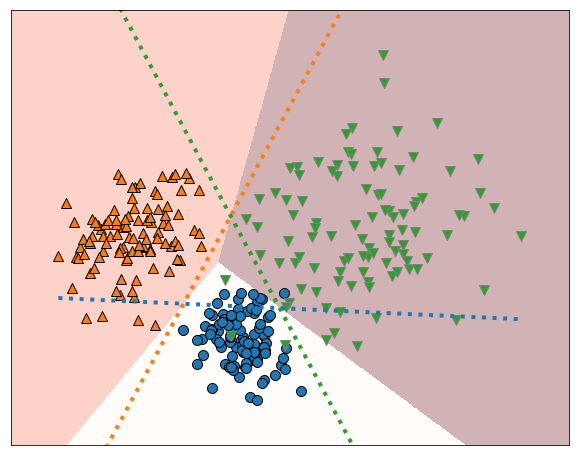

In [74]:
model = LogisticRegression(C=10000)
model.fit(X, y)
score = model.score(X, y)
print(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

w = model.coef_
b = model.intercept_

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(w[i,0]*rng + b[i])/w[i,1], ':', lw=4)

- 비용함수에 $ \frac{1}{C} \cdot \sum_i w_i^2 $ 항을 추가함
> C 의 역수는 $ \alpha $ 임 ($ \alpha \cdot \sum_i w_i^2 $)<br>
> penalty='l1' 인 경우 $ \frac{1}{C} \cdot \sum_i |w_i| $ 항이 추가됨

In [58]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It 

### Iris 데이터 - 속성 2개로 제한

In [78]:
from sklearn.datasets import load_iris

iris = load_iris()

col1 = 1
col2 = 3

X = iris.data[:, [col1,col2]]
y = iris.target

X.shape, y.shape

((150, 2), (150,))

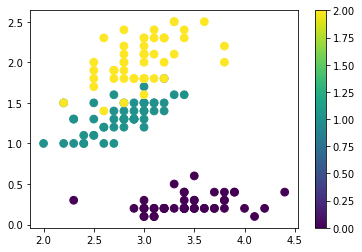

In [79]:
plt.scatter(X[:,0], X[:,1], c=y, s=60)
plt.colorbar()

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1)
model.fit(X, y)
score = model.score(X, y)
score

0.9466666666666667

In [93]:
display(model.coef_, model.intercept_)

array([[ 1.17857118, -4.20397905],
       [-1.06767017,  0.30439343],
       [-1.72595521,  3.95376877]])

array([-0.36473596,  2.07538234, -1.53014082])

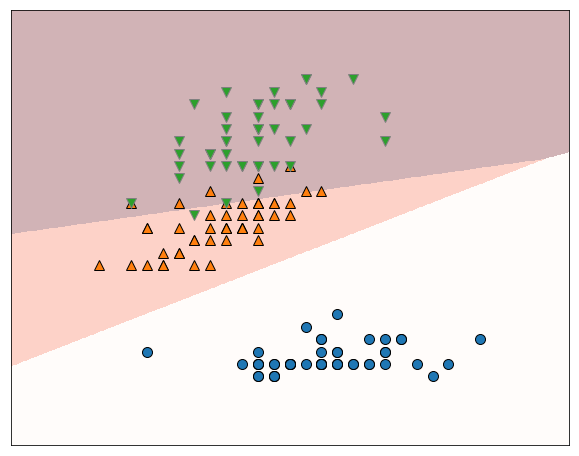

In [94]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

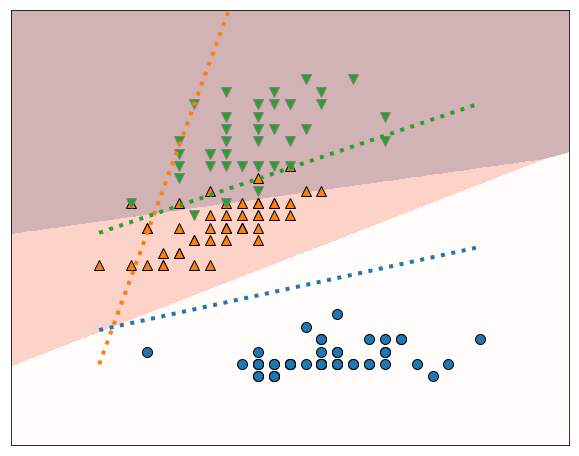

In [95]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='Reds', alpha=0.3)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

rng = np.array([X[:,0].min(), X[:,0].max()])
for i in range(3):
    plt.plot(rng, -(model.coef_[i,0]*rng + model.intercept_[i])/model.coef_[i,1], ':', lw=4)

### Iris 데이터 - 모든 속성 사용

In [104]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

X_train.shape, X_test.shape

((112, 4), (38, 4))

In [105]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(score_train, score_test)

0.9642857142857143 0.9210526315789473


In [106]:
display(model.coef_, model.intercept_)

array([[ 0.40661085,  1.37482745, -2.15189447, -0.9622436 ],
       [ 0.4401305 , -1.62491811,  0.56440298, -1.20934393],
       [-1.57815035, -1.31269996,  2.23922937,  2.23138205]])

array([ 0.2498939 ,  0.89584084, -1.04718742])

In [110]:
np.round(model.predict_proba(X_test), 3)[:5], y_test[:5]

(array([[0.001, 0.336, 0.663],
        [0.043, 0.782, 0.175],
        [0.968, 0.032, 0.   ],
        [0.001, 0.426, 0.574],
        [0.18 , 0.678, 0.143]]), array([2, 1, 0, 2, 1]))

In [111]:
pred_y = model.predict(X_test)

In [112]:
y_test[y_test!=pred_y]

array([1, 2, 1])

In [116]:
np.round(model.predict_proba(X_test)[y_test==2], 3)

array([[0.001, 0.336, 0.663],
       [0.001, 0.426, 0.574],
       [0.003, 0.301, 0.696],
       [0.   , 0.309, 0.691],
       [0.002, 0.257, 0.741],
       [0.001, 0.238, 0.761],
       [0.003, 0.508, 0.489],
       [0.001, 0.186, 0.814],
       [0.001, 0.269, 0.73 ],
       [0.001, 0.324, 0.675],
       [0.003, 0.432, 0.565],
       [0.   , 0.442, 0.558],
       [0.   , 0.438, 0.562],
       [0.006, 0.347, 0.648],
       [0.   , 0.454, 0.546],
       [0.002, 0.341, 0.657]])

### 옵션(C) 변경 및 과적합 판단

Text(0,0.5,'score')

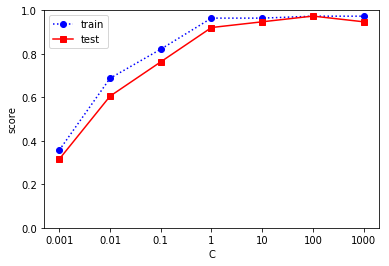

In [59]:
from sklearn.model_selection import train_test_split

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

s1 = []
s2 = []
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

for c in Cs:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    s1.append(score_train)
    s2.append(score_test)
    
plt.plot(s1,'bo:')
plt.plot(s2,'rs-')
plt.legend(['train','test'])
plt.xticks(range(len(Cs)),Cs)
plt.ylim(0,1)
plt.xlabel('C')
plt.ylabel('score')

### 시그모이드(sigmoid) 함수 적용

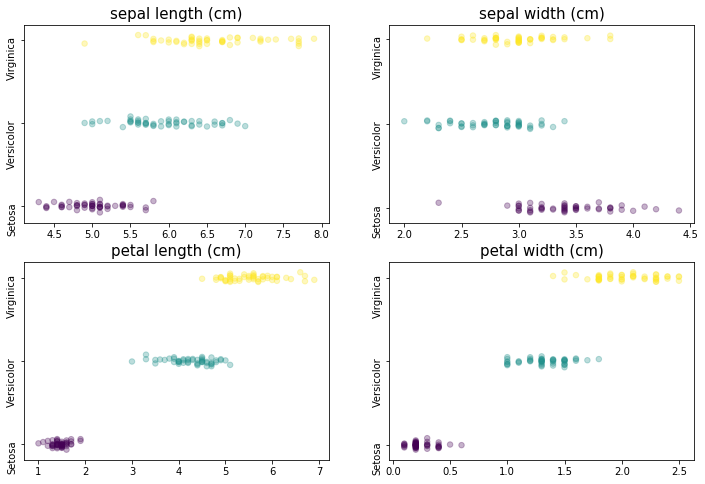

In [39]:
plt.figure(figsize=[12,8])

for col in range(4):
    plt.subplot(2,2,col+1)
    plt.scatter(iris.data[:,col], iris.target + np.random.normal(0,0.03,size=len(y)), c=iris.target, s=30, alpha=0.3)
    plt.yticks([0,1,2], ['Setosa', 'Versicolor', 'Virginica'], rotation=90)
    plt.title(iris.feature_names[col], fontsize=15)

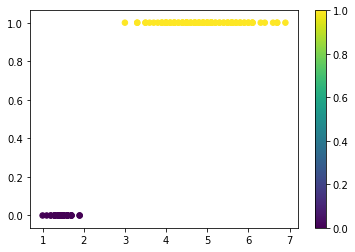

In [147]:
X = iris.data[:,[2]]
y = iris.target.copy()
y[y==2] = 1

plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

In [148]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

Text(0.5,1,'Sigmoid')

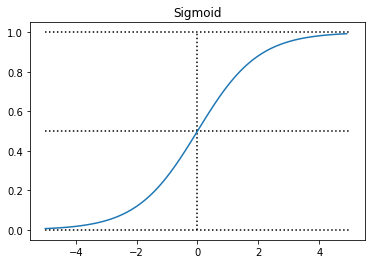

In [149]:
rng = np.arange(-5,5,0.1)
plt.plot(rng, sigmoid(rng))

plt.hlines([0,0.5,1],-5,5,linestyles='dotted')
plt.vlines([0],0,1,linestyles='dotted')
plt.title('Sigmoid')

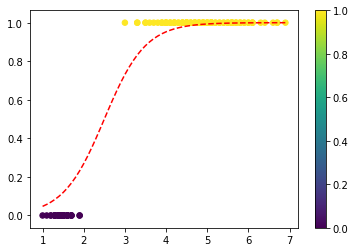

In [150]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, sigmoid(2*(rng-2.5)), 'r--')

In [157]:
from sklearn.linear_model import LogisticRegression

C = 1
model = LogisticRegression(C=C)
model.fit(X, y)

display(model.score(X, y), model.coef_, model.intercept_)

1.0

array([[1.72960591]])

array([-4.28674842])

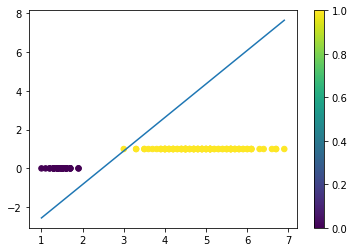

In [158]:
plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, model.coef_[0]*rng + model.intercept_)

In [159]:
경계값 = -model.intercept_/model.coef_
경계값

array([[2.47845384]])

(-0.5, 1.5)

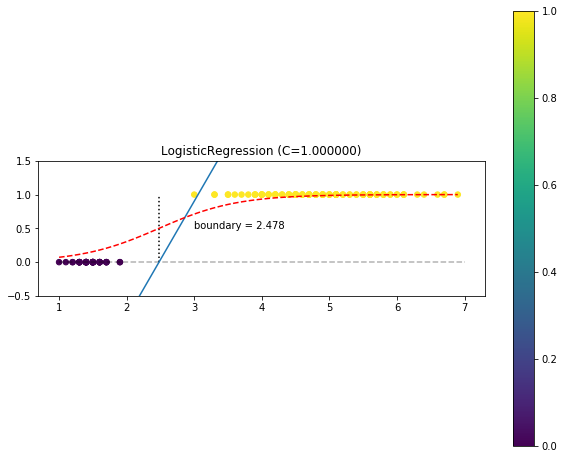

In [160]:
plt.figure(figsize=[10,8])

plt.scatter(X[:,0], y, c=y, s=30)
plt.colorbar()

rng = np.arange(1,7,0.1)
plt.plot(rng, model.coef_[0]*rng + model.intercept_)
plt.plot(rng, sigmoid(model.coef_[0,0]*rng+model.intercept_[0]), 'r--')
plt.vlines([-model.intercept_[0]/model.coef_[0,0]],0,1,linestyles='dotted')
plt.hlines([0],1,7,linestyles='dashed', alpha=0.3)
plt.text(3, 0.5, 'boundary = %.3f' % (-model.intercept_[0]/model.coef_[0,0]))
plt.title('LogisticRegression (C=%f)' % C)
plt.axis('scaled')
plt.ylim(-0.5, 1.5)

### 관련 기술
- 공식
$$ sigmoid(t) = \frac{1}{1 + e^{-t}} $$
<br>
$$ t = w \cdot x + b $$
<br>
$$ sigmoid(t) = \frac{1}{1 + e^{-(w \cdot x + b)}} $$
<br>
$$ t = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + b $$
$$ t = w_0 \cdot x_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + ... , (x_0=1)$$

- 소프트맥스(softmax) 함수
- 크로스 엔트로피 (cross entropy)

### 크로스 엔트로피
- 로지스틱 회귀의 비용함수로 사용함

#### 클래스가 2개인 경우
- cross_entropy = (-y * np.log(pred_y) - (1-y) * np.log(1-pred_y)).sum()

#### 클래스가 3개 이상인 경우
- cross_entropy = (-y * np.log(pred_y)).sum()
- 여기서 pred_y  는 소프트맥스 함수를 적용한 결과임
- 그리고, y 는 [1,0,0], [0,1,0], [0,0,1] 과 같이 원핫인코딩이어야 함

In [60]:
pred_y = [0.7, 0.2, 0.5, 0.3, 0.9]
y = [1, 0, 1, 1, 0]

In [62]:
mse = ((0.3)**2 + (0.2)**2 + (0.5)**2 + (0.7)**2 + (0.9)**2)/5
mse

0.33599999999999997

In [64]:
cross_entropy = -np.log(0.7) - np.log(1-0.2) - np.log(0.5) - \
    np.log(0.3) - np.log(1-0.9)
cross_entropy

4.779523573132869